<a href="https://colab.research.google.com/github/pransil/Alexa-colorsNames/blob/master/LazyPredictTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From [LazyPredict Tutorial](https://medium.com/@fareedkhandev/apply-40-machine-learning-models-in-two-lines-of-code-c01dad24ad99)

In [6]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 10.1 MB 41.5 MB/s 
     |████████████████████████████████| 269 kB 62.1 MB/s 
     |████████████████████████████████| 248 kB 56.5 MB/s 
     |████████████████████████████████| 72 kB 999 kB/s 
     |████████████████████████████████| 302 kB 58.8 MB/s 
     |████████████████████████████████| 14.5 MB 42.6 MB/s 
     |████████████████████████████████| 127.6 MB 24 kB/s 
     |████████████████████████████████| 1.2 MB 47.3 MB/s 
     |████████████████████████████████| 6.8 MB 3.2 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=09a47de76063cbd3f0ba6145edf2b47dee36adfabb4e964546f8e8df044796e7
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

Have to go back to scikit-learn v0.23 due to a deprecated utility.

In [6]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23

Found existing installation: scikit-learn 0.24.0
Uninstalling scikit-learn-0.24.0:
  Successfully uninstalled scikit-learn-0.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 15.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.0 which is incompatible.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 0.23.0 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [1]:
import pandas as pd

In [2]:
Mall_Customers_Dataset = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
df = pd.read_csv(Mall_Customers_Dataset)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.00,-0.03,0.98,0.01
Age,-0.03,1.00,-0.01,-0.33
Annual Income (k$),0.98,-0.01,1.00,0.01
Spending Score (1-100),0.01,-0.33,0.01,1.00


Added things to visualize:

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import display

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febd52480d0>,
      dtype=object)

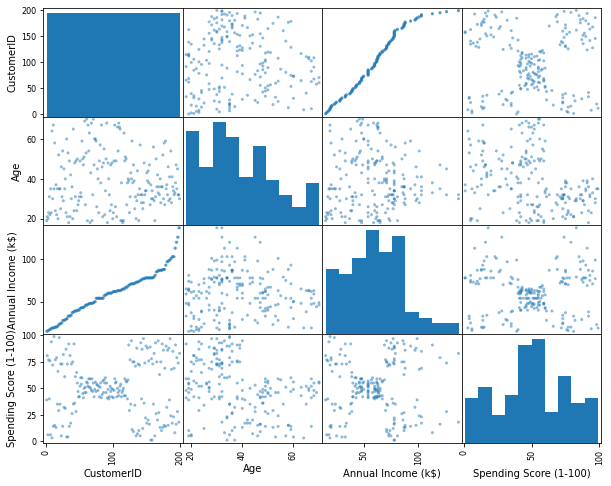

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
scatter_matrix(df[attributes], figsize = (10,8))

In [4]:
# Importing train / test split from dataset
from sklearn.model_selection import train_test_split

# Defining X and y vars
X = df.loc[:, df.columns != 'Spending Score (1-100)']
y = df['Spending Score (1-100)']

# Partitioning the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [5]:
# Importing lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
# Define the model
multiple_ML_model = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)

# Fit the models and predict outputs
models, predictions = multiple_ML_model.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.87it/s]


In [11]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.18,0.24,23.53,0.08
OrthogonalMatchingPursuit,0.04,0.11,25.44,0.05
OrthogonalMatchingPursuitCV,0.04,0.11,25.44,0.04
LGBMRegressor,0.04,0.11,25.47,0.04
LassoCV,0.03,0.10,25.63,0.09
Lasso,-0.00,0.07,26.05,0.03
ElasticNet,-0.01,0.05,26.20,0.02
LassoLarsCV,-0.02,0.05,26.31,0.03
LarsCV,-0.02,0.05,26.31,0.08
